In [1]:
from pyVHR.analysis.pipeline import Pipeline
import matplotlib.pyplot as plt

route = 'datasets/LGI-PPGI/cpi/cpi_talk/cv_camera_sensor_stream_handler.avi'
pipe = Pipeline()
time, BPM, uncertainty = pipe.run_on_video(route, roi_approach="patches", roi_method="faceparsing")


Processing Video: datasets/LGI-PPGI/cpi/cpi_talk/cv_camera_sensor_stream_handler.avi


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



In [3]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

cmsTree = ET.parse('datasets/LGI-PPGI/cpi/cpi_talk/cms50_stream_handler.xml')

cmsFrames = [] #60 fps

myroot = cmsTree.getroot()
for i in range(len(myroot)):
    cmsFrames.append([int(myroot[i][0].text),int(myroot[i][1].text),int(myroot[i][2].text)])
    

frames= [] 
secs = []
cms_cap = []
hr = []
for i in range(len(cmsFrames)):
#for i in range(2000):    
    frames.append(cmsFrames[i][0]) # frame
    hr.append(cmsFrames[i][1]) # heart rate
    cms_cap.append(cmsFrames[i][2]) # data captured
    secs.append(cmsFrames[i][0]/60)

print("x lnegh: ", len(frames))
print("cap lnegh: ", len(cms_cap))
print("hr lnegh: ", len(hr) )

x lnegh:  4988
cap lnegh:  4988
hr lnegh:  4988


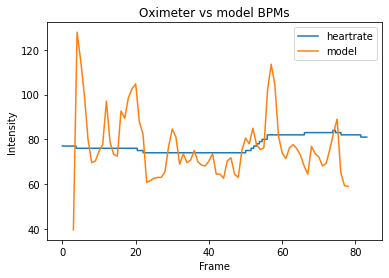

In [4]:
#plt.plot(frames, hr, label = "bps")


#plt.plot(frames, cms_cap, label = "data", linestyle='dashed', markerfacecolor='blue')

plt.figure(1)
plt.xlabel('Frame')
plt.ylabel('Intensity')
plt.title('Oximeter vs model BPMs')

plt.plot(secs, hr, label = "heartrate")
plt.plot(time, BPM, label = "model")
#plt.fill_between(time, BPM-uncertainty, BPM+uncertainty, alpha=0.2)
#plt.fill_between(time, BPM, BPM, alpha=0.2)
plt.legend()
plt.show()

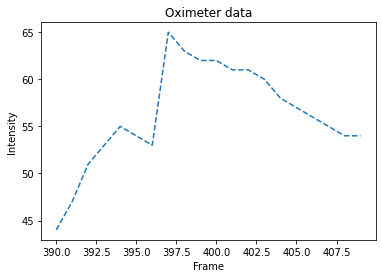

In [5]:
xt= [] 
capt = []
hrt = []
for i in range(390,410):    
    xt.append(cmsFrames[i][0]) # frame
    hrt.append(cmsFrames[i][1]) # heart rate
    capt.append(cmsFrames[i][2]) # data captured

#plt.plot(xt, hrt, label = "bps")
plt.plot(xt, capt, label = "data", linestyle='dashed', markerfacecolor='blue')

plt.xlabel('Frame')
plt.ylabel('Intensity')
plt.title('Oximeter data')
plt.show()



In [6]:
def get_min_max(x,y):
    max_by_frame = []
    max_frame = []
    min_by_frame = []
    min_frame = []
    delta_minus, delta_plus = 1,1

    for frame in range(len(x)):
        if (frame - delta_minus > 0) and (frame + delta_plus < len(x) -2):
            if y[frame] == y[frame - 1]:
                continue
            for delta in range(10):
                if y[frame] == y[frame + delta_plus]:
                    delta_plus+=1
                if y[frame] == y[frame - delta_minus]:
                    delta_minus+=1
                if not(y[frame] == y[frame - delta_minus]) and not(y[frame] == y[frame + delta_plus]):
                    break  
            if y[frame] > y[frame-delta_minus] and y[frame] > y[frame+delta_plus]: #max
                max_by_frame.append(y[frame])
                max_frame.append(frame)

            if y[frame] < y[frame-delta_minus] and y[frame] < y[frame+delta_plus]: #min
                min_frame.append(frame)
                min_by_frame.append(y[frame])

        delta_minus, delta_plus = 1,1

    print("Picks encontrados: ",len(max_frame))
    print("Valores por pick: ",len(max_by_frame))
    print("min_by_frame lengh: ",len(min_by_frame))
    print("min_frame lengh: ",len(min_frame))
    return [(max_frame, max_by_frame), (min_by_frame, min_frame)]


In [7]:
get_min_max(xt,capt)[0] #obtiene  el frame y el valor en el frame de cada pick de los datos xy,capt.

Picks encontrados:  2
Valores por pick:  2
min_by_frame lengh:  1
min_frame lengh:  1


([4, 7], [55, 65])

In [8]:
pick_frames, pick_max = get_min_max(frames,cms_cap)[0]

Picks encontrados:  127
Valores por pick:  127
min_by_frame lengh:  126
min_frame lengh:  126


In [9]:
differences = []

for element in range(len(pick_frames)):
    if not element == 0:
        x = pick_frames[element]
        y = pick_frames[element - 1]
        diff = abs(y - x)
        differences.append(diff)

In [10]:
seconds = []
bpm_m = []
for diff in differences:
    seconds.append(diff/60)
    bpm_m.append(60**2/diff)

   

In [11]:
total = 0
for i in seconds:
    total = i + total

In [12]:
delt = total/len(seconds)
time_interval = []
time_interval.append(0.0)
for i in range(1,len(seconds)):
    time_interval.append(time_interval[-1]+delt)

In [13]:
len(time_interval),len(differences)

(126, 126)

In [14]:
bpm_filtered = list(filter(lambda x: x<100,bpm_m))

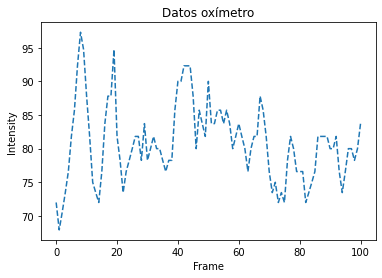

In [15]:
#plt.plot(frames, hr, label = "bpm")
plt.plot(range(0,len(bpm_filtered)), bpm_filtered, label = "BVP to BPM", linestyle='dashed', markerfacecolor='blue')

plt.xlabel('Frame')
plt.ylabel('Intensity')
plt.title('Datos oxímetro')
plt.show()

In [16]:
freq = []
for sec in seconds:
    freq.append(1/sec)

In [17]:
bpm = []
for fre in freq:
    bpm.append(fre*60)

In [8]:
a = "hola"
b = "hola"
a is b

True

In [5]:
a = "mizar!"
b = "mizar!"
a is b

False

In [9]:
id(a), id(b)

(140068607013232, 140068607013232)